### **Santander Customer Transaction Prediction Challenge**

**Objective:**
The goal of this competition is to predict which customers will make a specific transaction in the future. The prediction is binary, meaning you need to determine whether or not a customer will perform the transaction, regardless of the transaction amount.

**Key Points:**

- **Mission:** The challenge is part of Santander's efforts to improve their ability to predict customer behavior and financial health. The data science team aims to refine their algorithms for binary classification problems, such as predicting customer satisfaction, purchase likelihood, or loan repayment capability.

- **Data Provided:**
  - **Training Set (`train.csv`):** Contains features, a binary target variable, and a string `ID_code`.
  - **Test Set (`test.csv`):** Contains features and `ID_code`, but not the target variable.
  - **Sample Submission (`sample_submission.csv`):** Provides a template for how to format your predictions.

- **Evaluation Metric:** Submissions are evaluated based on the area under the ROC curve (AUC) between the predicted probabilities and the actual target values.

**Task:** 
For each `ID_code` in the test set, provide a binary prediction (0 or 1) indicating whether or not the customer will make the transaction.

<!-- ### **Desafío de Predicción de Transacciones de Clientes de Santander**

**Objetivo:**
El objetivo de esta competencia es predecir qué clientes realizarán una transacción específica en el futuro. La predicción es binaria, es decir, debes determinar si un cliente realizará o no la transacción, independientemente del monto de la transacción.

**Puntos Clave:**

- **Misión:** El desafío es parte de los esfuerzos de Santander para mejorar su capacidad de predecir el comportamiento y la salud financiera de los clientes. El equipo de ciencia de datos busca refinar sus algoritmos para problemas de clasificación binaria, como predecir la satisfacción del cliente, la probabilidad de compra o la capacidad de pago de un préstamo.

- **Datos Proporcionados:**
  - **Conjunto de Entrenamiento (`train.csv`):** Contiene características, una variable objetivo binaria y un `ID_code` en formato de cadena.
  - **Conjunto de Prueba (`test.csv`):** Contiene características y `ID_code`, pero no la variable objetivo.
  - **Muestra de Envío (`sample_submission.csv`):** Proporciona una plantilla para formatear tus predicciones.

- **Métrica de Evaluación:** Las presentaciones se evalúan en función del área bajo la curva ROC (AUC) entre las probabilidades predichas y los valores objetivos reales.

**Tarea:** 
Para cada `ID_code` en el conjunto de prueba, proporciona una predicción binaria (0 o 1) que indique si el cliente realizará o no la transacción. -->

##### https://www.kaggle.com/code/elasgustavoknaus/binary-class-spaceship-titanic/edit

In [ ]:
!pip install skimpy

In [2]:
import os
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from pandas.api.types import CategoricalDtype

from category_encoders import MEstimateEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score


# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Mute warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_36/400172512.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [3]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import plotly.express as px
from tqdm.auto import tqdm
import optuna
from joblib import dump, load
from optuna.samplers import TPESampler

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA, KernelPCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

from imblearn.over_sampling import SMOTE
# import eli5
# from eli5.sklearn import PermutationImportance

# External
from skimpy import skim



In [4]:
import sys
import os
sys.path.append('/kaggle/input/my-py-personal-utils-problemas-de-regresin')

# Importar el módulo de clases y objetos personales especificamente diseñado para manipular datos tabulares con pandas.
import my
from my import *

In [5]:
# llamamos a nuestra clase personalizada EDA para ello
eda = my_EDA()
dirp(eda) # funcion para poder ver clases publicas disponibles


Object my_EDA created

['create_features', 'exploration_cat', 'exploration_num', 'get_missing_values', 'hypo_test', 'info', 'plot_high_corr_heatmap', 'plot_missing', 'plot_variable_distribution', 'scarplot_strongs_vars', 'unique_values', 'vars_list']


None

# Data

In [6]:
train = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/train.csv')
test = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/test.csv')

In [7]:
display(train.head())
display(skim(train))

display(test.head())
display(skim(test))

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 200000 │ │ float64     │ 200   │                                                          │
│ │ Number of columns │ 202    │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA ┃ NA % ┃ mean      ┃ sd       ┃ p0      ┃ p25       ┃ p50     ┃ p75     ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ target       │  0 │    0 │    0.1005 │   0.3007 │       0 │         0 │       0 │       0 │     1 │ ▇    ▁ │  │
│ │ var_0        │  0 │    0 │     10.68 │     3.04 │  0.4084 │     8.454 │   10.52 │   12.76 │ 20.32 │  ▂▇▇▃▁ │  │
│ │ var_1        │  0 │    0 │    -1.628 │     4.05 │  -15.04 │     -4.74 │  -1.608 │   1.359 │ 10.38 │  ▃▇▇▅▁ │  │
│ │ var_2        │  0 │    0 │     10.72 │    2.641 │   2.117 │     8.722 │   10.58 │   12.52 │ 19.35 │  ▃▇▇▃  │  │
│ │ var_3        │  0 │    0 │     6.797 │    2.043 │ -0.0402 │     5.254 │   6.825 │   8.324 │ 13.19 │  ▃▇▇▃  │  │
│ │ var_4        │  0 │    0 │     11.08 │    1.623 │   5.075 │     9.883 │   11.11 │   12.26 │ 16.67 │  ▂▇▇▃  │  │
│ │ var_5        │  0 │    0 │    -5.065 │    7.863 │  -32.56 │     -11.2 │  -4.833 │  0.9248 │ 17.25 │  ▂▇▇▅▁ │  │
│ │ var_6        │  0 │    0 │     5.409 │   0.8666 │   2.347 │     4.768 │   5.385 │   6.003 │ 8.448 │  ▂▇▇▂  │  │
│ │ var_7        │  0 │    0 │     16.55 │    3.418 │    5.35 │     13.94 │   16.46 │    19.1 │ 27.69 │  ▃▇▇▃  │  │
│ │ var_8        │  0 │    0 │    0.2842 │    3.333 │  -10.51 │    -2.318 │  0.3937 │   2.938 │ 10.15 │  ▃▇▇▅  │  │
│ │ var_9        │  0 │    0 │     7.567 │    1.235 │    3.97 │     6.619 │    7.63 │   8.584 │ 11.15 │ ▁▅▇▇▅  │  │
│ │ var_10       │  0 │    0 │    0.3943 │    5.501 │  -20.73 │    -3.595 │  0.4873 │   4.383 │ 18.67 │  ▁▆▇▃  │  │
│ │ var_11       │  0 │    0 │    -3.246 │     5.97 │  -26.09 │    -7.511 │  -3.287 │  0.8528 │ 17.19 │  ▂▇▇▃  │  │
│ │ var_12       │  0 │    0 │     14.02 │   0.1901 │   13.43 │     13.89 │   14.03 │   14.16 │ 14.65 │ ▁▃▇▇▃  │  │
│ │ var_13       │  0 │    0 │      8.53 │     4.64 │  -6.011 │     5.073 │   8.604 │   12.27 │ 22.33 │  ▃▇▇▅  │  │
│ │ var_14       │  0 │    0 │     7.538 │    2.248 │   1.013 │     5.782 │    7.52 │    9.27 │ 14.94 │  ▅▇▇▃  │  │
│ │ var_15       │  0 │    0 │     14.57 │   0.4117 │   13.08 │     14.26 │   14.57 │   14.87 │ 15.86 │  ▂▇▇▃  │  │
│ │ var_16       │  0 │    0 │     9.333 │    2.557 │  0.6351 │     7.452 │   9.232 │   11.06 │ 17.95 │  ▃▇▇▂  │  │
│ │ var_17       │  0 │    0 │    -5.697 │    6.713 │  -33.38 │    -10.48 │  -5.666 │ -0.8108 │ 19.03 │  ▁▇▇▃  │  │
│ │ var_18       │  0 │    0 │     15.24 │    7.851 │  -10.66 │     9.178 │    15.2 │   21.01 │ 41.75 │  ▃▇▇▃  │  │
│ │ var_19       │  0 │    0 │     12.44 │    7.997 │   -12.4 │     6.276 │   12.45 │   18.43 │ 35.18 │  ▃▇▇▅▁ │  │
│ │ var_20       │  0 │    0 │     13.29 │    5.876 │  -

None

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 200000 │ │ float64     │ 200   │                                                          │
│ │ Number of columns │ 201    │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA  ┃ NA %  ┃ mean      ┃ sd       ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ var_0        │   0 │     0 │     10.66 │    3.037 │  0.1887 │   8.443 │   10.51 │   12.74 │ 22.32 │  ▃▇▆▂  │  │
│ │ var_1        │   0 │     0 │    -1.624 │    4.041 │  -15.04 │    -4.7 │  -1.591 │   1.343 │ 9.385 │  ▂▇▇▅▁ │  │
│ │ var_2        │   0 │     0 │     10.71 │    2.634 │   2.355 │   8.736 │   10.56 │    12.5 │ 18.71 │  ▃▇▇▃▁ │  │
│ │ var_3        │   0 │     0 │     6.788 │    2.053 │ -0.0224 │   5.231 │   6.822 │   8.328 │ 13.14 │  ▃▇▇▃  │  │
│ │ var_4        │   0 │     0 │     11.08 │    1.616 │   5.484 │   9.891 │    11.1 │   12.25 │ 16.04 │  ▂▇▇▃  │  │
│ │ var_5        │   0 │     0 │    -5.051 │    7.869 │  -27.77 │   -11.2 │  -4.834 │  0.9426 │ 17.25 │  ▅▇▇▅▁ │  │
│ │ var_6        │   0 │     0 │     5.415 │   0.8647 │   2.216 │   4.773 │   5.392 │   6.006 │ 8.303 │  ▂▇▇▃  │  │
│ │ var_7        │   0 │     0 │     16.53 │    3.424 │   5.714 │   13.93 │   16.42 │   19.09 │ 28.29 │  ▃▇▇▃  │  │
│ │ var_8        │   0 │     0 │    0.2771 │    3.333 │  -9.956 │  -2.304 │   0.372 │    2.93 │ 9.665 │  ▃▇▇▅  │  │
│ │ var_9        │   0 │     0 │     7.569 │    1.232 │   4.243 │   6.624 │   7.632 │   8.585 │    11 │ ▁▅▇▇▅  │  │
│ │ var_10       │   0 │     0 │    0.3713 │    5.509 │  -22.67 │  -3.626 │  0.4919 │   4.362 │ 20.21 │  ▁▆▇▃  │  │
│ │ var_11       │   0 │     0 │    -3.269 │    5.961 │  -25.81 │  -7.522 │  -3.315 │  0.8325 │ 16.77 │  ▂▇▇▃  │  │
│ │ var_12       │   0 │     0 │     14.02 │   0.1901 │   13.42 │   13.89 │   14.02 │   14.16 │ 14.68 │ ▁▃▇▇▂  │  │
│ │ var_13       │   0 │     0 │     8.541 │    4.629 │  -4.741 │   5.073 │   8.617 │   12.27 │ 21.61 │ ▁▅▇▇▅  │  │
│ │ var_14       │   0 │     0 │     7.533 │    2.255 │  0.6703 │   5.769 │   7.497 │   9.271 │ 14.72 │  ▅▇▇▃  │  │
│ │ var_15       │   0 │     0 │     14.57 │   0.4116 │    13.2 │   14.26 │   14.57 │   14.88 │  15.8 │  ▃▇▇▅▁ │  │
│ │ var_16       │   0 │     0 │     9.322 │    2.545 │  0.3143 │   7.454 │   9.229 │   11.04 │ 17.37 │  ▂▇▇▃▁ │  │
│ │ var_17       │   0 │     0 │    -5.704 │    6.746 │  -28.91 │   -10.5 │  -5.698 │ -0.8116 │ 19.15 │  ▃▇▇▂  │  │
│ │ var_18       │   0 │     0 │     15.27 │    7.847 │  -11.32 │   9.238 │    15.2 │   21.01 │ 38.93 │  ▃▇▇▅▁ │  │
│ │ var_19       │   0 │     0 │     12.46 │     7.99 │   -12.7 │   6.322 │   12.48 │   18.44 │ 35.43 │  ▃▇▇▅▁ │  │
│ │ var_20       │   0 │     0 │      13.3 │    5.884 │  -2.635 │    8.59 │   13.22 │   17.91 │ 32.08 │ ▁▆▇▇▃  │  │
│ │ var_21       │   0 │     0 │     17.23 │      8.2 │  -9.941 │   11.51 │   17.21 │   23.03 │ 47.42 │  ▃▇▇▂  │  │
│ │ var_22       │   0 │     0 │     4.299 │    2.844 │ 

None

In [8]:
print(f'Duplicates in train set: {train.duplicated().sum()}, ({np.round(100*train.duplicated().sum()/len(train),1)}%)')
print('')
print(f'Duplicates in test set: {test.duplicated().sum()}, ({np.round(100*test.duplicated().sum()/len(test),1)}%)')

Duplicates in train set: 0, (0.0%)

Duplicates in test set: 0, (0.0%)


# target distribution

Text(0.5, 1.0, 'Target distribution')

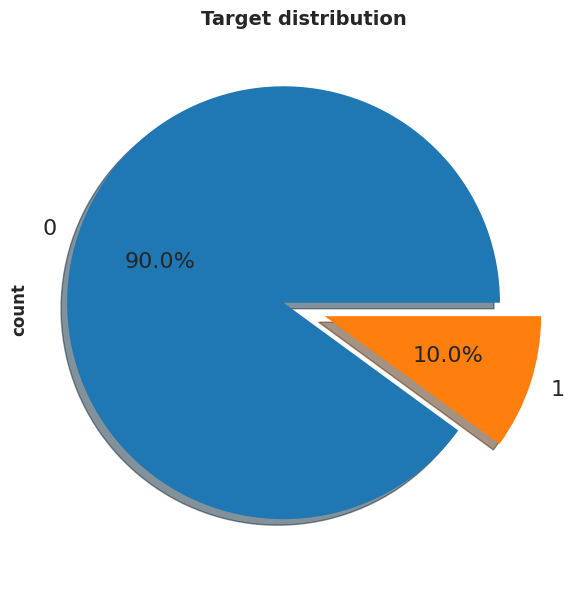

In [9]:
# Figure size
plt.figure(figsize=(6,6))
# Pie plot
train['target'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution")

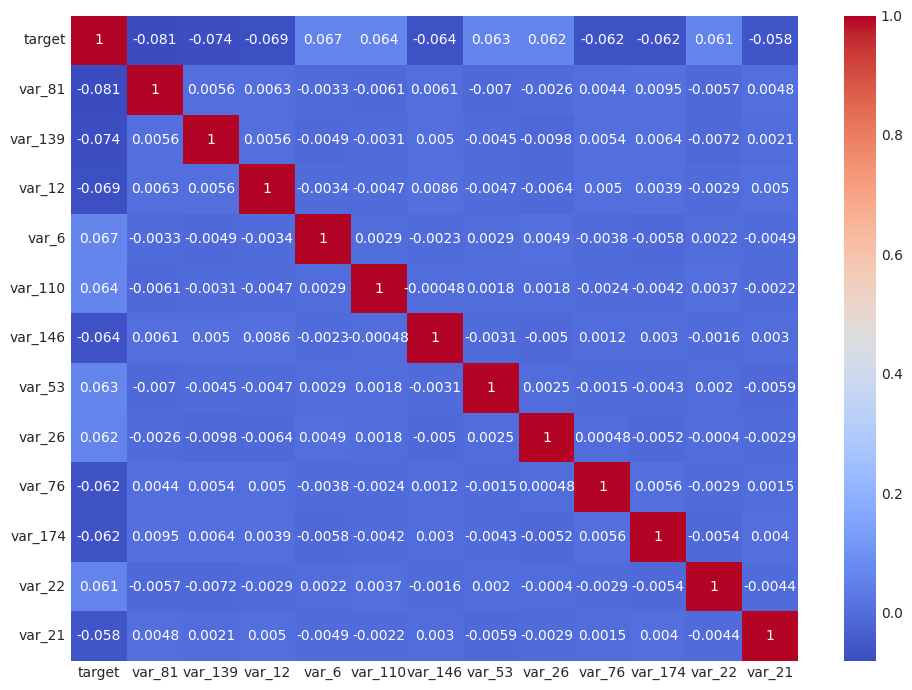

In [10]:
train = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/train.csv')
corr = eda.plot_high_corr_heatmap(train, 'target')

insing : I do not observe a strong correlation between features or between features and the target variable in this dataset."

# Load and process

In [11]:
train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [12]:
def load_d():
    train = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/train.csv')
    test = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/test.csv')
    return train, test
    
train, test = load_d()

test_ID = test.pop("ID_code")
y = train.pop("target")

train = train.drop("ID_code", axis = 1)

train_shape = train.shape[0] # rows
all_data = pd.concat([train,test], axis = 0)

## Base Line

Using KFold in combination with cross_validate gives you more control and precision in your evaluation. For example, you can ensure that the data is properly shuffled before splitting it into folds, and you can also tune parameters such as random_state for reproducibility.

In [13]:
# Muestra el 10% de X_train e y_train
X_train_sample = train.sample(frac=0.1, random_state=42)
y_train_sample = y.loc[X_train_sample.index]

--------

This ensures that each training and validation set has an adequate representation of each class, helping to make performance metrics such as AUC more reliable and representative<!-- Esto asegura que cada conjunto de entrenamiento y validación tiene una representación adecuada de cada clase, ayudando a que las métricas de rendimiento como el AUC sean más fiables y representativas -->

In [14]:
# Train-validation split
# X_train, X_valid, y_train, y_valid = train_test_split(train,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)

"Extract a representative 10% sample for feature engineering, and when compared to the full dataset, the machine learning algorithms converge with similar metrics."

In [15]:
%%time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

def score_dataset(X, y, model=LogisticRegression(max_iter=1000)):
    
    # Define metrics
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score)
    }
    
    # Cross-validation
    scores = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)
    
    # Calculate mean scores for each metric
    mean_scores = {metric: scores[f'test_{metric}'].mean() for metric in scoring.keys()}
    
    return mean_scores

# Ejemplo de uso
mean_scores = score_dataset(X_train_sample, y_train_sample) # vimos que la muestra nos retorna los mismos scores por lo que la vamos a usar para ingenieria de caract 1seg.
# mean_scores = score_dataset(train,y) # 10 seg
print(mean_scores['accuracy'])
print(mean_scores)

0.9114000000000001
{'accuracy': 0.9114000000000001, 'precision': 0.6579244465171431, 'recall': 0.2680589680589681, 'f1': 0.3805868813513553}
CPU times: user 54.5 s, sys: 20.1 s, total: 1min 14s
Wall time: 19.5 s




"These results indicate that while the model may be performing well overall (high accuracy), it is not doing a good job identifying positive instances (low recall and F1 Score). You may need to adjust the model, change the decision threshold, or consider alternative methods to improve the model's ability to identify all positive instances."

<!-- Estos resultados indican que, mientras que el modelo puede estar funcionando bien en términos generales (alta precisión global), no está haciendo un buen trabajo identificando correctamente las instancias positivas (bajo recall y F1 Score). Es posible que necesites ajustar el modelo, cambiar el umbral de decisión, o considerar otros métodos para mejorar la capacidad del modelo de identificar todas las instancias positivas. -->

# Feature Engineering

### 1 - feature utility score

In [16]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train_sample, y_train_sample)

In [17]:
mi_scores

var_57     0.007412
var_81     0.006932
var_44     0.005645
var_191    0.005602
var_31     0.005318
             ...   
var_7      0.000000
var_16     0.000000
var_152    0.000000
var_156    0.000000
var_140    0.000000
Name: MI Scores, Length: 200, dtype: float64

In [18]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0.0]

X = drop_uninformative(X_train_sample, mi_scores)

#previusly

In [19]:
mean_scores =score_dataset(X, y_train_sample)
print(mean_scores)

{'accuracy': 0.9063500000000001, 'precision': 0.6320502569283459, 'recall': 0.18591036177243075, 'f1': 0.28680756798832974}


### PCA

In [20]:

def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings


def pca_components(df, features):
    X = df.loc[:, features]
    _, X_pca, _ = apply_pca(X)
    return X_pca


# X1 = X_train_sample.copy()


# Muestra el 10% de X_train e y_train
X_train_sample = train.sample(frac=0.1, random_state=42)
y_train_sample = y.loc[X_train_sample.index]

_, X_pca, _ = apply_pca(X_train_sample)
score_dataset(X_pca, y_train_sample)

{'accuracy': 0.9116,
 'precision': 0.6604295250766279,
 'recall': 0.26904540007988287,
 'f1': 0.38210422120804666}

# Step 4 - Hyperparameter Tuning

In [21]:
# import optuna
# from xgboost import XGBClassifier
# from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# def score_dataset(X, y, model):
#     # Define metrics
#     scoring = {
#         'accuracy': 'accuracy',
#         'precision': make_scorer(precision_score),
#         'recall': make_scorer(recall_score),
#         'f1': make_scorer(f1_score)
#     }
    
#     # Cross-validation
#     scores = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)
    
#     # Calculate mean scores for each metric
#     mean_scores = {metric: scores[f'test_{metric}'].mean() for metric in scoring.keys()}
    
#     # You can use a specific metric here; e.g., 'f1' for the objective
#     return mean_scores['f1']


# def objective(trial):
#     xgb_params = dict(
#         max_depth=trial.suggest_int("max_depth", 2, 10),
#         learning_rate=trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
#         n_estimators=trial.suggest_int("n_estimators", 1000, 8000),
#         min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
#         colsample_bytree=trial.suggest_float("colsample_bytree", 0.2, 1.0),
#         subsample=trial.suggest_float("subsample", 0.2, 1.0),
#         reg_alpha=trial.suggest_float("reg_alpha", 1e-4, 1e2, log=True),
#         reg_lambda=trial.suggest_float("reg_lambda", 1e-4, 1e2, log=True),
#     )
#     xgb = XGBClassifier(**xgb_params)
#     return score_dataset(X_train, y_train, xgb)

# # Create and run the Optuna study
# study = optuna.create_study(direction="maximize")  # Maximize the chosen metric (e.g., 'f1')
# study.optimize(objective, n_trials=20)

# # Get the best parameters
# xgb_params = study.best_params
# print("Best parameters:", xgb_params)


In [22]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

# Asegúrate de que apply_pca esté correctamente definido y aplicado
_, X_train_pca, _ = apply_pca(train)

def score_dataset(X, y, model):
    # Define metrics
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score)
    }
    
    # Cross-validation
    scores = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)
    
    # Calculate mean scores for each metric
    mean_scores = {metric: scores[f'test_{metric}'].mean() for metric in scoring.keys()}
    
    # Use 'f1' as the objective metric
    return mean_scores['f1']

def objective(trial):
    xgb_params = dict(
        max_depth=trial.suggest_int("max_depth", 2, 10),
        learning_rate=trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        n_estimators=trial.suggest_int("n_estimators", 1000, 5000),  # Reduced range for efficiency
        min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.2, 1.0),
        subsample=trial.suggest_float("subsample", 0.2, 1.0),
        reg_alpha=trial.suggest_float("reg_alpha", 1e-4, 1e2, log=True),
        reg_lambda=trial.suggest_float("reg_lambda", 1e-4, 1e2, log=True),
        tree_method='gpu_hist',  # Enable GPU usage
        predictor='gpu_predictor'  # Use GPU for prediction
    )
    xgb = XGBClassifier(**xgb_params)
    return score_dataset(X_train_pca, y, xgb)

# Create and run the Optuna study
study = optuna.create_study(direction="maximize")  # Maximize the chosen metric (e.g., 'f1')
study.optimize(objective, n_trials=30)  # Adjust the number of trials based on available computational resources

# Get the best parameters
xgb_params = study.best_params
print("Best parameters:", xgb_params)


[I 2024-09-07 22:06:47,239] Trial 10 finished with value: 0.4377239873520121 and parameters: {'max_depth': 2, 'learning_rate': 0.08666992633560222, 'n_estimators': 4871, 'min_child_weight': 10, 'colsample_bytree': 0.9692004970474295, 'subsample': 0.9933533145259505, 'reg_alpha': 0.1522494349011223, 'reg_lambda': 2.9934702900229118}. Best is trial 10 with value: 0.4377239873520121.
[I 2024-09-07 22:08:32,186] Trial 11 finished with value: 0.4337814435129073 and parameters: {'max_depth': 2, 'learning_rate': 0.07392267793138582, 'n_estimators': 4892, 'min_child_weight': 10, 'colsample_bytree': 0.9953394670090127, 'subsample': 0.9979850247665392, 'reg_alpha': 0.23494970189965608, 'reg_lambda': 3.9405762213811806}. Best is trial 10 with value: 0.4377239873520121.
[I 2024-09-07 22:10:30,620] Trial 12 finished with value: 0.4400520100959531 and parameters: {'max_depth': 3, 'learning_rate': 0.08223420129556096, 'n_estimators': 4836, 'min_child_weight': 10, 'colsample_bytree': 0.926660291690839

Best parameters: {'max_depth': 2, 'learning_rate': 0.09881472078380095, 'n_estimators': 4991, 'min_child_weight': 10, 'colsample_bytree': 0.9843837249731312, 'subsample': 0.9836235850666106, 'reg_alpha': 0.22030580345789225, 'reg_lambda': 3.9675879462309553}



---

**Performance of a Logistic Regression Model vs. an XGBoost Classifier**: Using metrics such as **accuracy** and **F1 score**, it's important to consider what these values mean in the context of your data and binary classification problem. Here is an analysis of your metrics:

### Logistic Regression

- **Accuracy: 90%**
  - This means the model correctly classifies 90% of the instances in the dataset.
  - The overall accuracy is high, which can be appealing, but accuracy doesn't always reflect performance in imbalanced problems where one class may be much more frequent than the other.

- **F1 Score: 28% (0.28)**
  - An F1 score of 0.28 indicates that the model has a poor balance between precision and recall.
  - In binary classification contexts, a low F1 score suggests that the model is struggling to correctly identify positive instances, even if the accuracy is high.
  - This low F1 score could be a sign that the model is biased towards the majority class and is not effectively detecting the minority class.

### XGBoost Classifier

- **F1 Score: 0.4377**
  - An F1 score of 0.4377 is higher than that of logistic regression, indicating a better ability to balance precision and recall.
  - Although the F1 score is still relatively low, it shows an improvement over the logistic regression model, suggesting that XGBoost is better at identifying positive instances.

---

Interpretation:

The Logistic Regression model has a high overall accuracy but a very low F1 score, indicating that it is failing to detect the positive class despite good overall accuracy.
The XGBoost Classifier has a better F1 score, suggesting that it is doing a better job of identifying the positive class, although there may still be room for improvement.

Best parameters: {'max_depth': 2, 'learning_rate': 0.09881472078380095, 'n_estimators': 4991, 'min_child_weight': 10, 'colsample_bytree': 0.9843837249731312, 'subsample': 0.9836235850666106, 'reg_alpha': 0.22030580345789225, 'reg_lambda': 3.9675879462309553}


In [23]:
train

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,6.1629,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,8.7542,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
